In [11]:
%store -r sheyenne_grasslands_gdf caddo_grasslands_gdf data_dir sheyenne_soil_dir caddo_soil_dir

In [73]:
import os
from math import floor, ceil

import rioxarray as rxr
from rioxarray.merge import merge_arrays # Merge rasters
import matplotlib.pyplot as plt

In [7]:
# def my_function(fname, lname):
#     print(fname, 'Hello from a function', lname)

# my_function('louie', 'roberts')

louie Hello from a function roberts


In [8]:
# def kid_functions(*kids):
#     print('the younges thild is '+ kids[-1])

# kid_functions("emma", "knox", "louie")

the younges thild is louie


In [9]:
# def kid_functions_2(child3, child2, child1):
#     print('the younges thild is ' + child3)

# kid_functions_2(child1='emma', child2='knox', child3='louie')

the younges thild is louie


In [10]:
# def kid_functions_3(**kid):
#     print('His last name is ' + kid['lname'])

# kid_functions_3(fname = 'Tobias', lname = 'Refsnes')

His last name is Refsnes


In [15]:
# def add_function(integer):
#     for x in integer:
#         sum = x + 10
#     return sum

In [23]:
# add_function([12])

22

In [18]:
# add_function([1, 2])

12


In [20]:
# integer_list = [1, 2]

# add_function(integer_list)

12

In [24]:
# results_list = []
# for i in integer_list:
#     sums = add_function([i])
#     results_list.append(sums)

# results_list

[11, 12]

### Tried to do a loop and function to process all the grassland climate data at once:

In [ ]:
# results_list = []
# rcp_list = [45, 85]
# row_list = [0, 1, 2, 3]
# for rcp in rcp_list:
#     print(rcp)
#     for row in row_list:
#         print(row)
#         grassland_rcp_annual_precip_da = process_climate_da(rcp, maca_df, row)
#         print(grassland_rcp_annual_precip_da)
#         results_list.append(grassland_rcp_annual_precip_da)

# results_list

In [7]:
# ## putting results in a dictionary
# # gdfs = [site1_gdf, site2_gdf]
# # bounds_dict = {}
# # for gdf in gdfs:
# #     bounds = do_something(gdf)
# #     site_name = gdf.NAME
# #     bounds_dict[site_name] = bounds
# site_list = [{'name': 'Site 1', 'value': 1},
#            {'name': 'Site 2', 'value': 2}]
# results_dict = {}
# for site_dict in site_list:
#     site_name = site_dict['name']
#     print(site_name)
#     squared_value = site_dict['value'] ** 2
#     print(squared_value)
#     results_dict[site_name] = squared_value
# results_dict

Site 1
1
Site 2
4


{'Site 1': 1, 'Site 2': 4}

In [8]:
# # We need the .items() below to go through the values of the dict
# for i in results_dict:
#     print(i)

Site 1
Site 2


In [9]:
# results_step2_dict = {}
# for site_name, squared_value in results_dict.items():
#     print(site_name)
#     print(squared_value)
#     results_step2_dict[site_name] = squared_value + 4
# results_step2_dict

Site 1
1
Site 2
4


{'Site 1': 5, 'Site 2': 8}

In [10]:
# sites = ['site 1', 'site 2']
# results_step3_dict = {}
# for site in sites:
#     print(site)
#     print(results_step2_dict[site])
#     results_step3_dict[site] = results_step2_dict[site] / 3
# results_step3_dict

site 1


KeyError: 'site 1'

In [ ]:
# OG LOOOOOOP w/ beginning attemps of only downloading once
# #  Define Sheyenne bounds
# sheyenne_bounds = s_bounds_min_lon, s_bounds_min_lat, s_bounds_max_lon, s_bounds_max_lat = (
#     sheyenne_grasslands_gdf
#     #.to_crs(ccrs.UTM(zone=14))
#     .total_bounds)
# display(sheyenne_bounds)

# #  Define the sheyenne download URL template for the soil data
# sheyenne_soil_template_url = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/"
#             "v1.0"
#             "/ph"
#             "/mean"
#             "/60_100"
#             "/lat4647_lon{min_lon}{max_lon}.tif")
# display(sheyenne_soil_template_url)

# # List out all the Sheyenne soil files we will need to download
# sheyenne_soil_url_list = []
# for min_lon in range(floor(s_bounds_min_lon), ceil(s_bounds_max_lon)):
#     for min_lat in range(floor(s_bounds_min_lat), ceil(s_bounds_max_lat)):
#         max_lon = min_lon + 1
#         soil_url = sheyenne_soil_template_url.format(
#             min_lon=min_lon,
#             max_lon=max_lon)
#         sheyenne_soil_url_list.append(soil_url)
# display(sheyenne_soil_url_list)

# sheyenne_das = []
# # Loop through each of the soil files
# for i in sheyenne_soil_url_list:
#     # Only download once -- Save raster data to the disk
#     soil_path = os.path.join(sheyenne_soil_dir, f"soil_lat4647_lon{min_lon}{max_lon}.tif")
#     print(soil_path)

#     if not os.path.exists(soil_path):
#         # Load the raster data into Python, mask and scale and squeeze w/ .tif files
#         soil_da = rxr.open_rasterio(
#             i,
#             mask_and_scale=True
#             ).squeeze()
#         soil_da.to_netcdf(soil_path)
#         print('OPENED')

#     # Open and squeeze data set
#     soil_da = rxr.open_rasterio(
#     i,
#     mask_and_scale=True
#     ).squeeze()

#     # Crop the raster data
#     cropped_da = soil_da.rio.clip_box(*sheyenne_bounds)
#     sheyenne_das.append(cropped_da)
#     print('CROPPED')

# display(sheyenne_das)

# # Merge tiles
# sheyenne_merged_das = merge_arrays(sheyenne_das)
# sheyenne_merged_das.plot()

### **Attempting to turn soil download into a function**

In [43]:
# Define process_soil_da function
def process_soil_da(grasslands_gdf, grassland_soil_dir,
                    variable='variable',
                    statistic='statistic',
                    depth='depth'):
    """
    short description
    -----------------
    
    long description
    ----------------
    
    Parameters
    ----------
    
    Returns
    -------
    
    """
    #  Define the Caddo download URL template for the soil data
    soil_url_template = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/"
                         "v1.0"
                         "/{variable}"
                         "/{statistic}"
                         "/{depth}"
                         "/lat{min_lat}{max_lat}"
                         "_lon{min_lon}{max_lon}.tif")
    
    # Define grassland bounds
    grassland_bounds = (grassland_bounds_min_lon,
                        grassland_bounds_min_lat,
                        grassland_bounds_max_lon,
                        grassland_bounds_max_lat) = (
                        grasslands_gdf
                        .total_bounds)

    # List out all the grasslamd soil files we will need to download
    grassland_soil_das = []
    for min_lon in range(floor(grassland_bounds_min_lon),
                         ceil(grassland_bounds_max_lon)):
        for min_lat in range(floor(grassland_bounds_min_lat),
                             ceil(grassland_bounds_max_lat)):
            max_lon = min_lon + 1
            max_lat = min_lat + 1
            soil_url = soil_url_template.format(
                variable=variable,
                statistic=statistic,
                depth=depth,
                min_lat=min_lat,
                max_lat=max_lat,
                min_lon=min_lon,
                max_lon=max_lon)
            
            # Define the file path for saving the downloaded raster data
            soil_path = os.path.join(grassland_soil_dir, f"soil_{variable}_{statistic}_{depth}_lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif")
            # print(f'Soil path: {soil_path}')

            if not os.path.exists(soil_path):
                # Load the raster data into Python, mask and scale and squeeze w/ .tif files
                soil_da = rxr.open_rasterio(
                    soil_url,
                    mask_and_scale=True
                    ).squeeze()
                soil_da.to_netcdf(soil_path)
                print(f'soil_da saved: {soil_path}')
            else:
                print(f'file already exists: {soil_path}')

            # Open and squeeze data set
            soil_da = rxr.open_rasterio(
                soil_url,
                mask_and_scale=True
            ).squeeze()

            # Crop the raster data
            cropped_da = soil_da.rio.clip_box(*grassland_bounds)
            grassland_soil_das.append(cropped_da)
            print('Cropped')
            
    return grassland_soil_das

In [45]:
sheyenne_ph_das = process_soil_da(sheyenne_grasslands_gdf, sheyenne_soil_dir, variable='ph', statistic='mean', depth='60_100')

file already exists: C:\Users\riede\earth-analytics\data\habitat-suitability\sheyenne-soil-ph\soil_ph_mean_60_100_lat4647_lon-98-97.tif
Cropped
file already exists: C:\Users\riede\earth-analytics\data\habitat-suitability\sheyenne-soil-ph\soil_ph_mean_60_100_lat4647_lon-97-96.tif
Cropped


In [36]:
sheyenne_ph_das

[<xarray.DataArray (y: 1717, x: 1688)> Size: 12MB
 [2898296 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 14kB -97.47 -97.47 -97.47 ... -97.0 -97.0 -97.0
   * y            (y) float64 14kB 46.57 46.57 46.57 46.57 ... 46.1 46.1 46.1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area,
 <xarray.DataArray (y: 1717, x: 222)> Size: 2MB
 [381174 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 2kB -97.0 -97.0 -97.0 ... -96.94 -96.94 -96.94
   * y            (y) float64 14kB 46.57 46.57 46.57 46.57 ... 46.1 46.1 46.1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area]

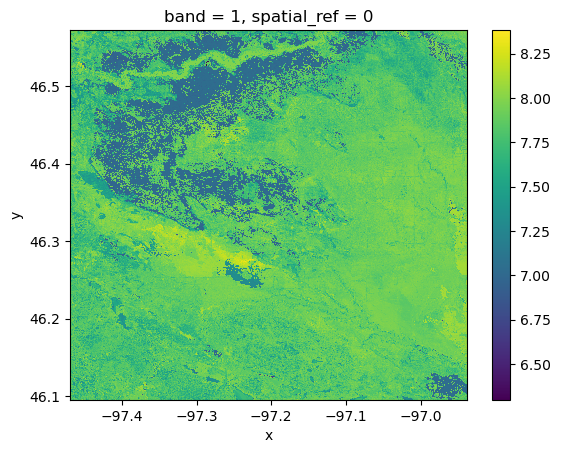

In [37]:
sheyenne_merged_das = merge_arrays(sheyenne_ph_das)
sheyenne_merged_das.plot()

### Making simpler functions for soil

In [52]:
#  Define the Caddo download URL template for the soil data'
def soil_url_temp(variable='variable',
                  statistic='statistic',
                  depth='depth'):
    soil_url_template = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/"
                    "v1.0"
                    f"/{variable}"
                    f"/{statistic}"
                    f"/{depth}"
                    "/lat{min_lat}{max_lat}"
                    "_lon{min_lon}{max_lon}.tif")
    return soil_url_template

In [59]:
# Define grassland bounds
def define_bounds(grassland_gdf):
    grassland_bounds = (grassland_bounds_min_lon,
                        grassland_bounds_min_lat,
                        grassland_bounds_max_lon,
                        grassland_bounds_max_lat) = (
                        grassland_gdf
                        .total_bounds)
    return grassland_bounds, grassland_bounds_min_lon, grassland_bounds_min_lat, grassland_bounds_max_lon, grassland_bounds_max_lat

In [60]:
def process_soil_da2(grassland_soil_dir,
                     soil_url_template,
                     grassland_bounds,
                     grassland_bounds_min_lon,
                     grassland_bounds_min_lat,
                     grassland_bounds_max_lon,
                     grassland_bounds_max_lat,
                     variable='variable',
                     statistic='statistic',
                     depth='depth'):
    # List out all the grasslamd soil files we will need to download
    grassland_soil_das = []
    for min_lon in range(floor(grassland_bounds_min_lon),
                         ceil(grassland_bounds_max_lon)):
        for min_lat in range(floor(grassland_bounds_min_lat),
                             ceil(grassland_bounds_max_lat)):
            max_lon = min_lon + 1
            max_lat = min_lat + 1
            soil_url = soil_url_template.format(
                min_lat=min_lat,
                max_lat=max_lat,
                min_lon=min_lon,
                max_lon=max_lon)
            
            # Define the file path for saving the downloaded raster data
            soil_path = os.path.join(grassland_soil_dir, f"soil_{variable}_{statistic}_{depth}_lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif")
            # print(f'Soil path: {soil_path}')

            if not os.path.exists(soil_path):
                # Load the raster data into Python, mask and scale and squeeze w/ .tif files
                soil_da = rxr.open_rasterio(
                    soil_url,
                    mask_and_scale=True
                    ).squeeze()
                soil_da.to_netcdf(soil_path)
                print(f'soil_da saved: {soil_path}')
            else:
                print(f'file already exists: {soil_path}')

            # Open and squeeze data set
            soil_da = rxr.open_rasterio(
                soil_url,
                mask_and_scale=True
            ).squeeze()

            # Crop the raster data
            cropped_da = soil_da.rio.clip_box(*grassland_bounds)
            grassland_soil_das.append(cropped_da)
            print('Cropped')

    return grassland_soil_das

In [61]:
sheyenne_url_temp = soil_url_temp(variable='ph', statistic='mean', depth='60_100')

In [66]:
sheyenne_bounds = define_bounds(sheyenne_grasslands_gdf)
sheyenne_bounds[1]

np.float64(-97.46881033436894)

In [68]:
process_soil_da2(sheyenne_soil_dir,
                 sheyenne_url_temp,
                 sheyenne_bounds[0],
                 sheyenne_bounds[1],
                 sheyenne_bounds[2],
                 sheyenne_bounds[3],
                 sheyenne_bounds[4],
                 variable='ph',
                 statistic='mean',
                 depth='60_100')

file already exists: C:\Users\riede\earth-analytics\data\habitat-suitability\sheyenne-soil-ph\soil_ph_mean_60_100_lat4647_lon-98-97.tif
Cropped
file already exists: C:\Users\riede\earth-analytics\data\habitat-suitability\sheyenne-soil-ph\soil_ph_mean_60_100_lat4647_lon-97-96.tif
Cropped


[<xarray.DataArray (y: 1717, x: 1688)> Size: 12MB
 [2898296 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 14kB -97.47 -97.47 -97.47 ... -97.0 -97.0 -97.0
   * y            (y) float64 14kB 46.57 46.57 46.57 46.57 ... 46.1 46.1 46.1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area,
 <xarray.DataArray (y: 1717, x: 222)> Size: 2MB
 [381174 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 2kB -97.0 -97.0 -97.0 ... -96.94 -96.94 -96.94
   * y            (y) float64 14kB 46.57 46.57 46.57 46.57 ... 46.1 46.1 46.1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area]

### New attempt at making simpler soil functions, putting define bounds back in process fxn

In [69]:
def process_bounds_soil_da(grasslands_gdf,
                           grassland_soil_dir,
                           soil_url_template,
                           variable='variable',
                           statistic='statistic',
                           depth='depth'):
    # Define grassland bounds
    grassland_bounds = (grassland_bounds_min_lon,
                        grassland_bounds_min_lat,
                        grassland_bounds_max_lon,
                        grassland_bounds_max_lat) = (
                        grasslands_gdf
                        .total_bounds)
    # List out all the grasslamd soil files we will need to download
    grassland_soil_das = []
    for min_lon in range(floor(grassland_bounds_min_lon),
                         ceil(grassland_bounds_max_lon)):
        for min_lat in range(floor(grassland_bounds_min_lat),
                             ceil(grassland_bounds_max_lat)):
            max_lon = min_lon + 1
            max_lat = min_lat + 1
            soil_url = soil_url_template.format(
                min_lat=min_lat,
                max_lat=max_lat,
                min_lon=min_lon,
                max_lon=max_lon)
            
            # Define the file path for saving the downloaded raster data
            soil_path = os.path.join(grassland_soil_dir, f"soil_{variable}_{statistic}_{depth}_lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif")
            # print(f'Soil path: {soil_path}')

            if not os.path.exists(soil_path):
                # Load the raster data into Python, mask and scale and squeeze w/ .tif files
                soil_da = rxr.open_rasterio(
                    soil_url,
                    mask_and_scale=True
                    ).squeeze()
                soil_da.to_netcdf(soil_path)
                print(f'soil_da saved: {soil_path}')
            else:
                print(f'file already exists: {soil_path}')

            # Open and squeeze data set
            soil_da = rxr.open_rasterio(
                soil_url,
                mask_and_scale=True
            ).squeeze()

            # Crop the raster data
            cropped_da = soil_da.rio.clip_box(*grassland_bounds)
            grassland_soil_das.append(cropped_da)
            print('Cropped')

    return grassland_soil_das

In [70]:
sheyenne_soil_das = process_bounds_soil_da(
    sheyenne_grasslands_gdf,
    sheyenne_soil_dir,
    sheyenne_url_temp,
    variable='ph',
    statistic='mean',
    depth='60_100'
)
sheyenne_soil_das

file already exists: C:\Users\riede\earth-analytics\data\habitat-suitability\sheyenne-soil-ph\soil_ph_mean_60_100_lat4647_lon-98-97.tif
Cropped
file already exists: C:\Users\riede\earth-analytics\data\habitat-suitability\sheyenne-soil-ph\soil_ph_mean_60_100_lat4647_lon-97-96.tif
Cropped


[<xarray.DataArray (y: 1717, x: 1688)> Size: 12MB
 [2898296 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 14kB -97.47 -97.47 -97.47 ... -97.0 -97.0 -97.0
   * y            (y) float64 14kB 46.57 46.57 46.57 46.57 ... 46.1 46.1 46.1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area,
 <xarray.DataArray (y: 1717, x: 222)> Size: 2MB
 [381174 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 2kB -97.0 -97.0 -97.0 ... -96.94 -96.94 -96.94
   * y            (y) float64 14kB 46.57 46.57 46.57 46.57 ... 46.1 46.1 46.1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area]

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

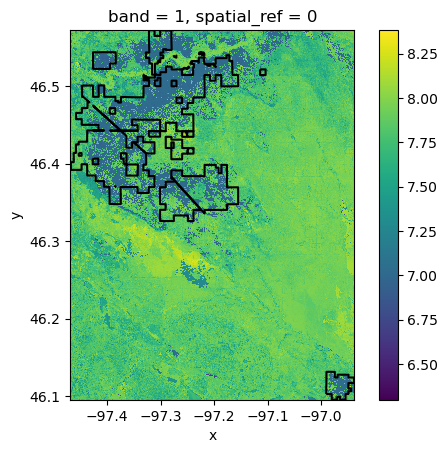

In [74]:
sheyenne_merged_das = merge_arrays(sheyenne_soil_das)
sheyenne_merged_das.plot()

# Plot Sheyenne National Grasslands on sheyenne_soil_da
sheyenne_grasslands_gdf.to_crs(sheyenne_merged_das.rio.crs).boundary.plot(ax = plt.gca(), color='black')